# Netplotbrain with spring layout subplot

While networks on brains are useful as they show the geographical locations of nodes, there are other useful ways to visualize networks.
One such example is a spring layout visualizaiton that plots based on the weight of edges.
Netplotbrain integrates with networkx to easily plot spring layout plots with all the same high-level visualizaitons.

The key argument is specifying view='s' (note lowercase).

In the below example we see view='LSs' to plot left, superior and spring-layout subplots.

[Open interactive notebothh in Binder](https://mybinder.org/v2/gh/wiheto/netplotbrain/main?filepath=docs/gallery/spring_layout.ipynb)

In [1]:
# Import all necessary files
import pandas as pd
import numpy as np
import netplotbrain
import matplotlib.pyplot as plt
import templateflow.api as tf
import itertools
# Set random seed for reproducibility
np.random.seed(2022)

We are going to download 100 nodes from the Schaefer atlas from templateflow.

We are then going to set the between community edges to be around 0 and the within community edges to be around 0.5.

In [2]:
atlas = {'template': 'MNI152NLin2009cAsym',
         'atlas': 'Schaefer2018',
        'desc': '100Parcels7Networks'}
atlasinfo = tf.get(extension='.tsv', **atlas)
atlasinfo = pd.read_csv(atlasinfo, sep='\t')
# Resolution argument needed in atlas later nii.gz file
atlas['resolution'] = 1
# Parse the info in to get network names
networks = list(map(lambda x: x.split('_')[2], atlasinfo.name.values))
atlasinfo['yeo7networks'] = networks
# Rename longer network names
atlasinfo['yeo7networks'].replace('DorsAttn', 'DA', inplace=True)
atlasinfo['yeo7networks'].replace('SalVentAttn', 'VA', inplace=True)
atlasinfo['yeo7networks'].replace('Default', 'DMN', inplace=True)
atlasinfo['yeo7networks'].replace('SomMot', 'SM', inplace=True)

In [3]:
# create empty cognitive matrix
edges = np.random.normal(0, 0.025, [100, 100])

# Set within network connectivity to be stronger
for network in atlasinfo['yeo7networks'].unique():
    idx =  atlasinfo[atlasinfo['yeo7networks']==network].index
    idx_pairs = np.array(list(itertools.combinations(idx, 2)))
    edges[idx_pairs[:, 0], idx_pairs[:, 1]] = np.random.normal(0.5, 0.025, [len(idx_pairs)])
    edges[idx_pairs[:, 1], idx_pairs[:, 0]] = np.random.normal(0.5, 0.025, [len(idx_pairs)])

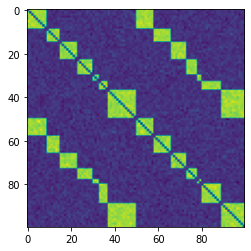

In [4]:
# Show what the connectivity matrix looks like
fig, ax = plt.subplots(1)
ax.imshow(edges)

(<Figure size 648x252 with 4 Axes>,
 [<Axes3DSubplot:title={'center':'Left'}>,
  <Axes3DSubplot:title={'center':'Superior'}>,
  <Axes3DSubplot:>,
  <AxesSubplot:>])

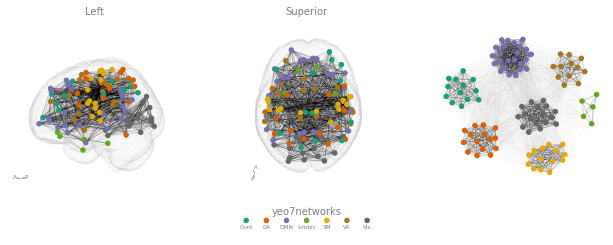

In [5]:
# Plot it all
netplotbrain.plot(template='MNI152NLin2009cAsym',
                  nodes=atlas,
                  nodes_df=atlasinfo,
                  edges=edges,
                  view='LSs',
                  template_style='glass',
                  node_scale=20,
                  node_color='yeo7networks',
                  edge_threshold=0,
                  edge_thresholddirection='>',
                  seed=2022)